In [1]:
from analysis.utils import (
    fetch_runs,
    plot_combined_heads_individual,
    plot_kl_divergence_simple,
    plot_val_loss_simple,
)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/rodrigoalvarezlucendo/Desktop/ar-classification/.venv/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/Users/rodrigoalvarezlucendo/Desktop/ar-classification/.venv/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` m

In [2]:
runs = fetch_runs(tags_any=["ICLR-Fig1"])
for run in runs:
    print(run.name)

apricot-paper-1676
decent-gorge-1677
cool-eon-1677
hearty-puddle-1679
fearless-capybara-1686


In [ ]:
attention_steps = [0, 60, 300, 1000]
generic_divergence_steps = [2350, 2650]
div_steps = {"i0a1de0a": [2330, 2575]}
max_steps = 3100
figsize = (10, 8)  # Increased from (4, 5) for better visibility
shift_steps = True

Processing: apricot-paper-1676 (i0a1de0a)


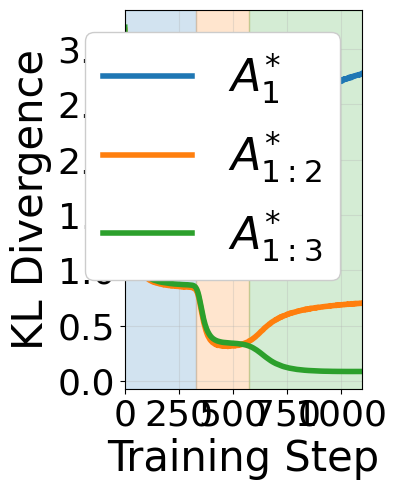

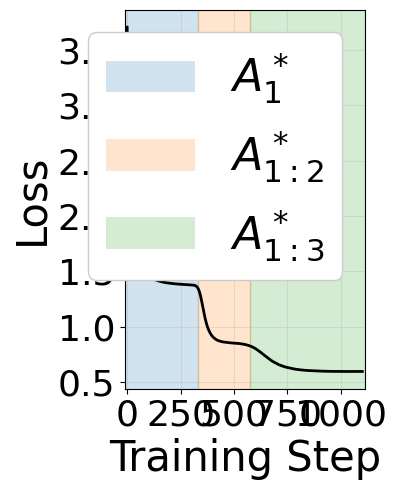

In [4]:
for run in runs[:1]:
    run_id = run.id
    run_name = run.name
    print(f"Processing: {run_name} ({run_id})")

    d_steps = div_steps.get(run_id, generic_divergence_steps)

    plot_kl_divergence_simple(
        run_id=run_id,
        divergence_steps=d_steps,
        max_steps=max_steps,
        figsize=figsize,
        learnable=False,
        shift_steps=shift_steps,
    )

    plot_val_loss_simple(
        run_id=run_id,
        divergence_steps=d_steps,
        max_steps=max_steps,
        figsize=figsize,
        shift_steps=shift_steps,
    )

## Individual Attention Heads

wandb:   1 of 1 files downloaded.  


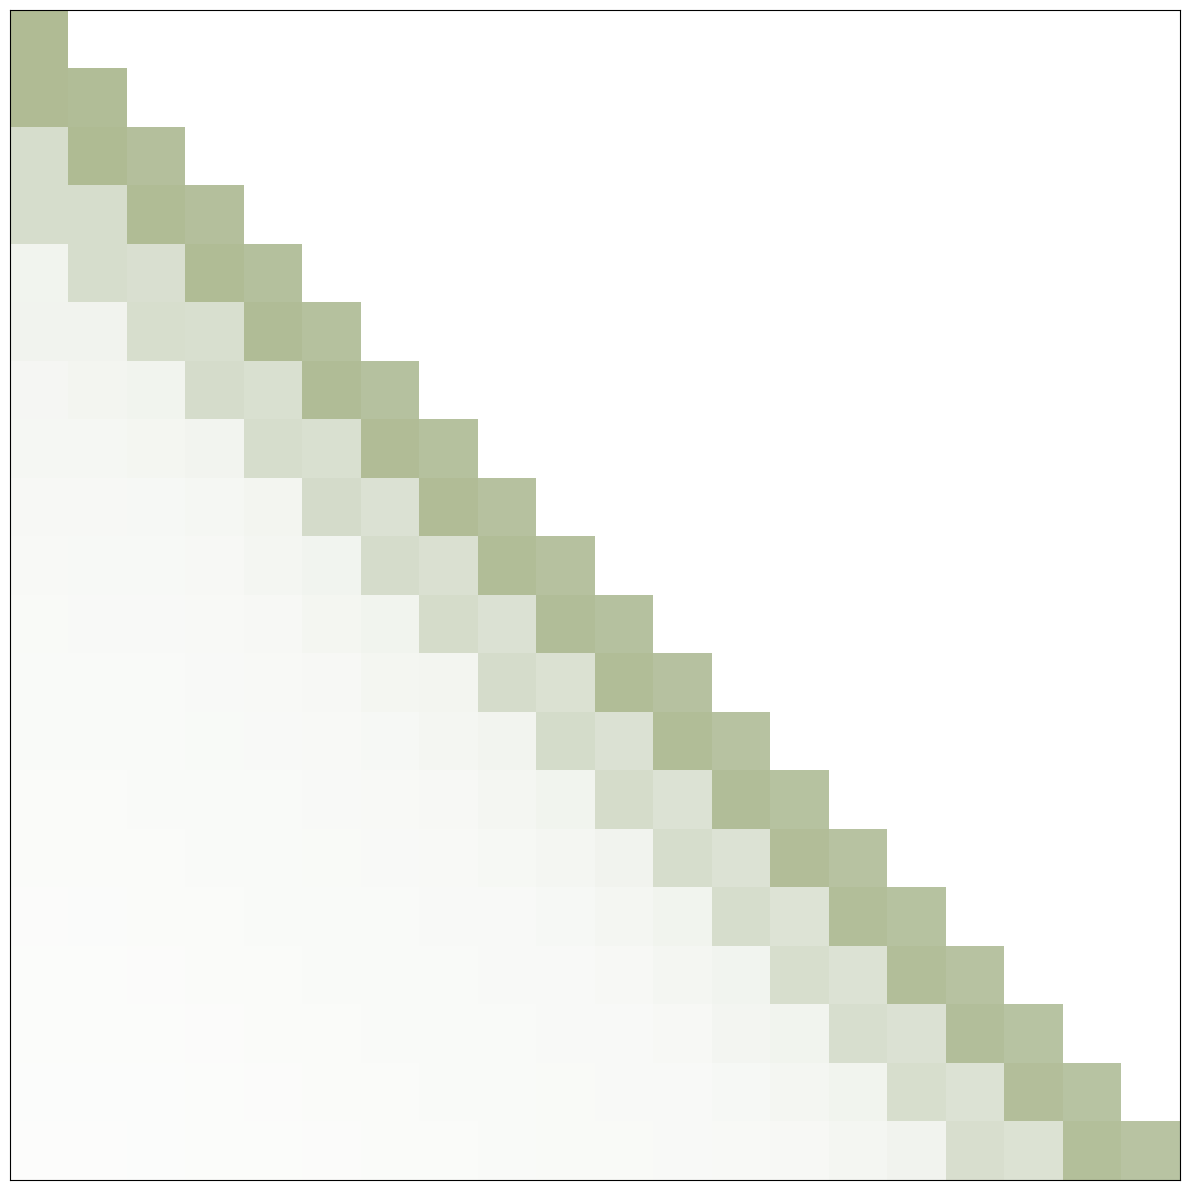

wandb:   1 of 1 files downloaded.  


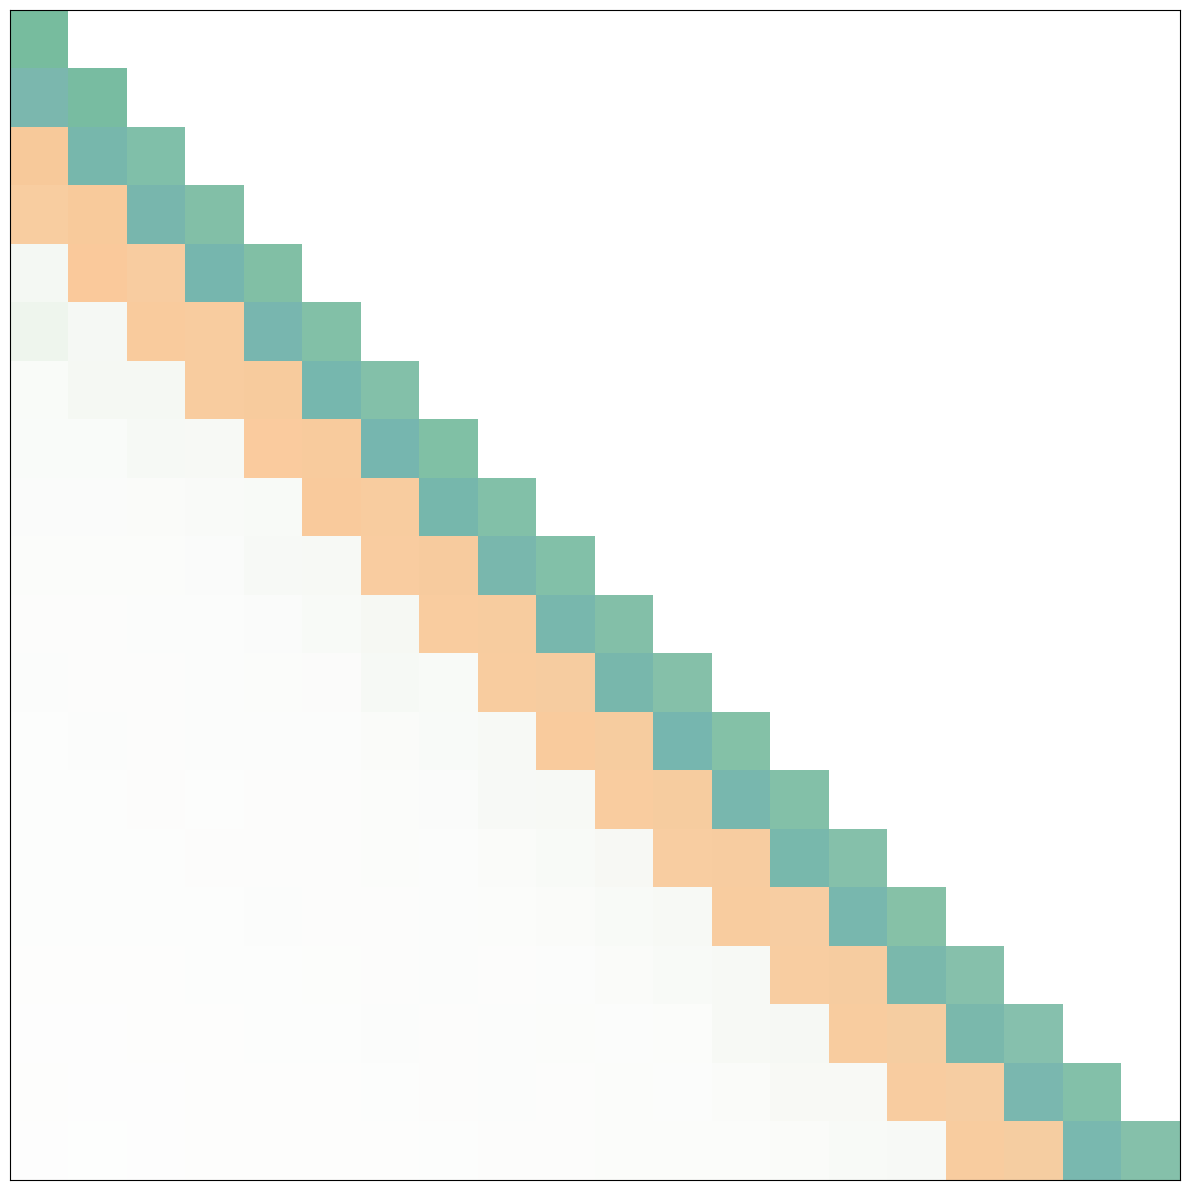

wandb:   1 of 1 files downloaded.  


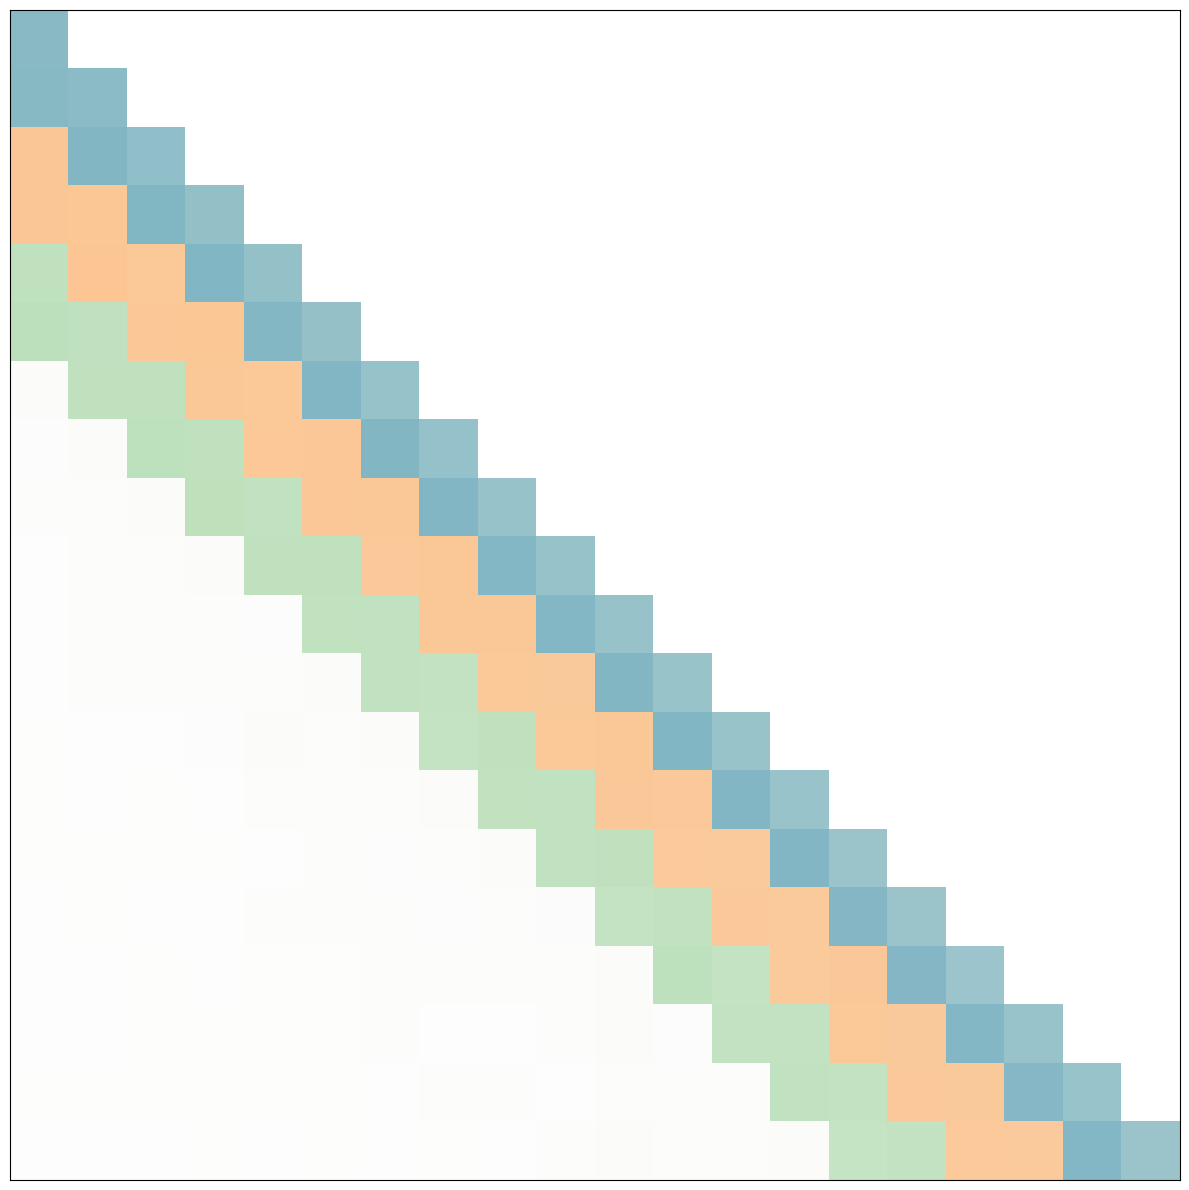

In [5]:
for step in [150, 500, 1000]:
    plot_combined_heads_individual(
        "run-i0a1de0a-val_attention_weights", step=step, split="val", gamma=1
    )

## Ideal Attention Patterns

In [ ]:
data = np.zeros((20, 20))
for i in range(0, 2):
    np.fill_diagonal(data[i:], 1)

plt.figure(figsize=(8, 8))  # Increased from (6, 5) for better visibility
sns.heatmap(data, cmap=["white", "#1f77b4"], cbar=False, square=True)
plt.xticks([])
plt.yticks([])

diagonal_offsets = [0, -2]
nq = nk = 20
x_edges = np.arange(0, nk + 0.5, 1)
for off in diagonal_offsets:
    y_centers = np.clip(np.arange(nk) - off, 0, nq)
    y_post = np.r_[y_centers, y_centers[-1]]
    plt.step(x_edges, y_post, where="post", color="black", linewidth=2)
plt.savefig("figures/ideal_attention_head1.pdf", bbox_inches="tight", dpi=300)

In [ ]:
data = np.zeros((20, 20))
for i in range(2, 4):
    np.fill_diagonal(data[i:], 1)

plt.figure(figsize=(8, 8))  # Increased from (6, 5) for better visibility
sns.heatmap(data, cmap=["white", "#ff7f0e"], cbar=False, square=True)
plt.xticks([])
plt.yticks([])

diagonal_offsets = [-2, -4]
x_edges = np.arange(0, 20 + 0.5, 1)
for off in diagonal_offsets:
    y_centers = np.clip(np.arange(20) - off, 0, 20)
    y_post = np.r_[y_centers, y_centers[-1]]
    plt.step(x_edges, y_post, where="post", color="black", linewidth=2)
plt.savefig("figures/ideal_attention_head2.pdf", bbox_inches="tight", dpi=300)

In [ ]:
data = np.zeros((20, 20))
for i in range(4, 6):
    np.fill_diagonal(data[i:], 1)

plt.figure(figsize=(8, 8))  # Increased from (6, 5) for better visibility
sns.heatmap(data, cmap=["white", "#2ca02c"], cbar=False, square=True)
plt.xticks([])
plt.yticks([])

diagonal_offsets = [-4, -6]
x_edges = np.arange(0, 20 + 0.5, 1)
for off in diagonal_offsets:
    y_centers = np.clip(np.arange(20) - off, 0, 20)
    y_post = np.r_[y_centers, y_centers[-1]]
    plt.step(x_edges, y_post, where="post", color="black", linewidth=2)
plt.savefig("figures/ideal_attention_head3.pdf", bbox_inches="tight", dpi=300)